# NFL Play-by-Play 2009-2016

In [1]:
#Import the useful Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",100)


In [2]:
#import the warnings.
import warnings
warnings.filterwarnings(action="ignore")

### Reading the input data from file

In [3]:
# Read the file of "NFL Play by Play 2009-2016 (v3).csv" in df1
df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

In [4]:
# print the head of the dataframe
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


### Understanding the structure of data

In [5]:
# Checking the column of NFL Play by Play 2009-2016 (v3) dataset
df.shape

(362447, 102)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [7]:
# Let us check the datatype of each column of the dataframe
df.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object

In [8]:
# Descriptive statistics
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,362447.000000,361724.000000,336850.000000,362447.0,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,7919.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,338765.000000,338765.000000,340472.000000,338765.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362447.000000,362447.000000,362299.000000,362125.000000,141806.000000,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,25.907895,0.049422,0.291183,1.0,5.034595,0.072171,0.029166,0.000392,0.001368,0.412882,3.271648,1.253747,0.052355,0.011215,0.296452,0.248566,37.379341,0.014272,0.027094,0.008227,0.071969,0.608792,10.257134,11.474904,-1.191217,7.830319,0.041134,2.519651,2.540589,2.514224,2.520297,2.493382,0.127559,0.094798,0.002514,0.140266,0.243912,0.002635,0.296208,0.024350,0.000690,1.564915,0.020177,0.526933,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,24.859579,0.216747,0.454308,0.0,9.144627,0.258770,0.168271,0.019790,0.036968,0.492353,7.511632,4.199049,0.222743,0.105308,0.456693,0.432182,10.306545,0.118612,0.162356,0.090331,0.258437,2.607951,9.460576,9.946084,10.791503,7.477384,0.198601,0.778920,0.760446,0.781086,0.780078,0.800497,0.199399,0.072123,0.003458,0.110672,0.158945,0.001462,0.167838,0.152240,0.018059,1.752432,1.331720,1.392090,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,-87.000000,0.000000,0.000000,1.0,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-81.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.836488,-13.494136,-12.849594,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,-7.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.002803,0.034652,0.000104,0.039944,0.152578,0.001890,0.191605,0.000000,0.000000,0.323526,-0.598006,-0.498824,-0.964562,0.323129,0.230595,0.319464,0.226

### Missing Value Check

In [9]:
# Checking the null values present in each column of the dataframe
df.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [10]:
df.isnull().mean()*100

Date         0.000000
GameID       0.000000
Drive        0.000000
qtr          0.000000
down        14.958877
              ...    
Win_Prob     6.067922
WPA          1.329022
airWPA      60.902146
yacWPA      60.962292
Season       0.000000
Length: 102, dtype: float64

In [11]:
# let us check the columns which have null values greater than 40%
unwanted_col = df.isnull().sum()/len(df)*100
unwanted_col = unwanted_col[unwanted_col>40]
unwanted_col

ExPointResult        97.503635
TwoPointConv         99.854324
DefTwoPoint          99.996137
PuntResult           94.513129
Passer               58.865986
Passer_ID            58.183679
PassOutcome          58.718378
PassLength           58.980210
PassLocation         58.980210
Interceptor          98.879836
Rusher               70.425193
Rusher_ID            69.572931
RunLocation          70.682610
RunGap               78.523205
Receiver             60.325234
Receiver_ID          61.323449
ReturnResult         95.613152
Returner             93.678524
BlockingPlayer       99.970754
Tackler1             40.608144
Tackler2             87.749381
FieldGoalResult      97.788366
FieldGoalDistance    97.815129
RecFumbTeam          98.914600
RecFumbPlayer        98.914600
ChalReplayResult     99.180294
PenalizedTeam        92.803086
PenaltyType          95.972377
PenalizedPlayer      93.112372
Timeout_Team         95.886571
airEPA               60.875383
yacEPA               60.901042
airWPA  

In [13]:
# Let us check the no.of unwanted columns
len(unwanted_col)

34

I've identified that 34 columns in the 'df' dataframe contain more than 40% missing values.  To enhance the stability and efficiency of our analysis and to derive meaningful insights from the data, I have decided to remove these columns from the
'df1' dataframe.

In [14]:
# Let's drop the columns which have more than 40% of null values
df = df.drop(columns=unwanted_col.index)

In [16]:
 #let us check the shape of dataframe after removing columns
df.shape

(362447, 68)

In [18]:
# Let us check the column name after dropping the column having 40% of null values
df.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'AirYards', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown',
       'RushAttempt', 'Reception', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob',
       'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob'

In [20]:
# let us again check the null values present in each column
df.isnull().mean()*100

Date                            0.000000
GameID                          0.000000
Drive                           0.000000
qtr                             0.000000
down                           14.958877
time                            0.051870
TimeUnder                       0.000000
TimeSecs                        0.051870
PlayTimeDiff                    0.103188
SideofField                     0.124156
yrdln                           0.199477
yrdline100                      0.199477
ydstogo                         0.000000
ydsnet                          0.000000
GoalToGo                        0.199477
FirstDown                       7.062274
posteam                         6.064059
DefensiveTeam                   6.064059
desc                            0.000552
PlayAttempted                   0.000000
Yards.Gained                    0.000000
sp                              0.000000
Touchdown                       0.000000
Safety                          0.000000
Onsidekick      

In [21]:
# For columns having missing value less than 13%
col_lessthan13_value = df.isnull().mean()*100
col_lessthan13_value1 = col_lessthan13_value[col_lessthan13_value<13]
col_lessthan13_value1

Date                           0.000000
GameID                         0.000000
Drive                          0.000000
qtr                            0.000000
time                           0.051870
TimeUnder                      0.000000
TimeSecs                       0.051870
PlayTimeDiff                   0.103188
SideofField                    0.124156
yrdln                          0.199477
yrdline100                     0.199477
ydstogo                        0.000000
ydsnet                         0.000000
GoalToGo                       0.199477
FirstDown                      7.062274
posteam                        6.064059
DefensiveTeam                  6.064059
desc                           0.000552
PlayAttempted                  0.000000
Yards.Gained                   0.000000
sp                             0.000000
Touchdown                      0.000000
Safety                         0.000000
Onsidekick                     0.000000
PlayType                       0.000000


In [22]:
# Let us check the column which have less than 13% of null values
len(col_lessthan13_value1)

67

There are total 66 columns in "df1" dataset which have less than 13% of missing value

In [23]:
# Drop duplicates
df = df.drop_duplicates()


In [24]:
# Now our data is clean and ready
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 0


#### Let us check which columns are categorical and which columns are numerical

In [25]:
df.columns[df.nunique()<=60]

Index(['Drive', 'qtr', 'down', 'TimeUnder', 'SideofField', 'yrdln', 'ydstogo',
       'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'PlayAttempted',
       'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'QBHit', 'InterceptionThrown', 'RushAttempt', 'Reception', 'Fumble',
       'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards',
       'DefTeamScore', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'ExPoint_Prob', 'TwoPoint_Prob', 'Season'],
      dtype='object')

In [26]:
df.columns[df.nunique()>60]

Index(['Date', 'GameID', 'time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'desc', 'Yards.Gained', 'AirYards', 'YardsAfterCatch',
       'PosTeamScore', 'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre',
       'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA'],
      dtype='object')

Grouped the columns into two categories
1. Cat_col : Columns having less than 60 unique numeric values
2. Cont_col : Columns having more than or equal to 60 unique numeric values

In [27]:
Cat_col = df.columns[df.nunique()<=60]
Cat_col


Index(['Drive', 'qtr', 'down', 'TimeUnder', 'SideofField', 'yrdln', 'ydstogo',
       'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'PlayAttempted',
       'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'QBHit', 'InterceptionThrown', 'RushAttempt', 'Reception', 'Fumble',
       'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards',
       'DefTeamScore', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'ExPoint_Prob', 'TwoPoint_Prob', 'Season'],
      dtype='object')

In [28]:
Num_col = df.columns[df.nunique()>60]
Num_col

Index(['Date', 'GameID', 'time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'desc', 'Yards.Gained', 'AirYards', 'YardsAfterCatch',
       'PosTeamScore', 'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre',
       'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA'],
      dtype='object')

### Approach of imputing missing values

When addressing missing values, the imputation strategy varies for numerical and categorical columns are different. 
For numerical columns, utilizing the median or mean for imputation is common. Imputing the median value is considered a
superior approach compared to using the mean, as the median is less sensitive to outliers, resulting in a more robust imputation method."For categorical columns, mode is the best method for imputation

#### handling missing values in Categorical column.

In [29]:
df["FirstDown"].nunique()

2

In [30]:
df["FirstDown"].isnull().mean()*100

7.062273932464609

In [31]:
# Let us find the mode of the column 'SidofFiled'
mod = df["FirstDown"].mode()[0]
df["FirstDown"] = df["FirstDown"].fillna(mod)


In [32]:
# After imputing let us check the null value present in the column 'SideofField'

df["FirstDown"].isnull().mean()*100

0.0

In [33]:
df["DefensiveTeam"].nunique()

34

In [34]:
df["DefensiveTeam"].isnull().mean()*100

6.064059021043076

In [35]:
# Let us find the mode of the column 'DefensiveTeam'
mod1 = df["DefensiveTeam"].mode()[0]
df["DefensiveTeam"] = df["DefensiveTeam"].fillna(mod1)


In [36]:
# After imputing let us check the null value present in the column 'DefensiveTeam'

df["DefensiveTeam"].isnull().mean()*100

0.0

In [37]:
# The code for imputing the mode in palce of missing value for categorical columns

for i in Cat_col:
    if df[i].isnull().any():  # Check if there are missing values in the column
        mod2 = df[i].mode()[0]
        df[i] = df[i].fillna(mod2)

### handling missing values in Numerical column.

In [38]:
# Convert data types if necessary
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
Num_col = [ 'GameID', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'Yards.Gained', 'AirYards', 'YardsAfterCatch', 'PosTeamScore',
       'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob',
       'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre', 'Away_WP_pre',
       'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA']

(NOT EXECUTED THIS)

The code for imputing the median in palce of missing value for numerical columns

for i in Num_col:

    med = df[i].median()
    
    df[i]=df[i].fillna(med)

In [40]:
df.isnull().mean()*100

Date                           0.000000
GameID                         0.000000
Drive                          0.000000
qtr                            0.000000
down                           0.000000
time                           0.051870
TimeUnder                      0.000000
TimeSecs                       0.051870
PlayTimeDiff                   0.103188
SideofField                    0.000000
yrdln                          0.000000
yrdline100                     0.199477
ydstogo                        0.000000
ydsnet                         0.000000
GoalToGo                       0.000000
FirstDown                      0.000000
posteam                        0.000000
DefensiveTeam                  0.000000
desc                           0.000552
PlayAttempted                  0.000000
Yards.Gained                   0.000000
sp                             0.000000
Touchdown                      0.000000
Safety                         0.000000
Onsidekick                     0.000000


In [41]:
overall_missing_percentage = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")


Overall Missing Percentage: 0.67%


### Handling Outliers

In [42]:
print(Num_col)

['GameID', 'TimeSecs', 'PlayTimeDiff', 'yrdline100', 'ydsnet', 'Yards.Gained', 'AirYards', 'YardsAfterCatch', 'PosTeamScore', 'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA']


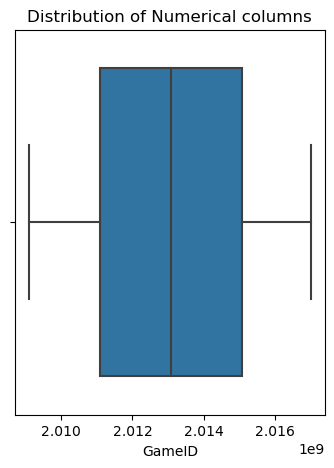

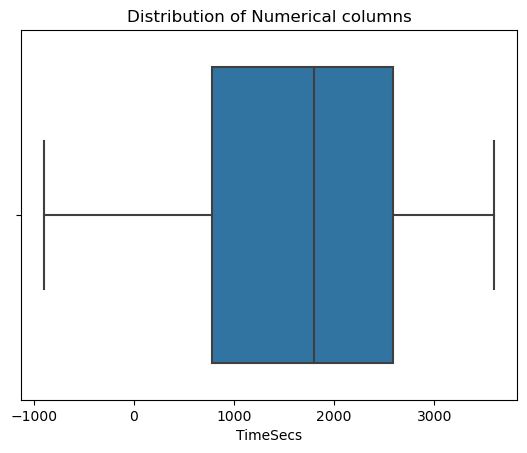

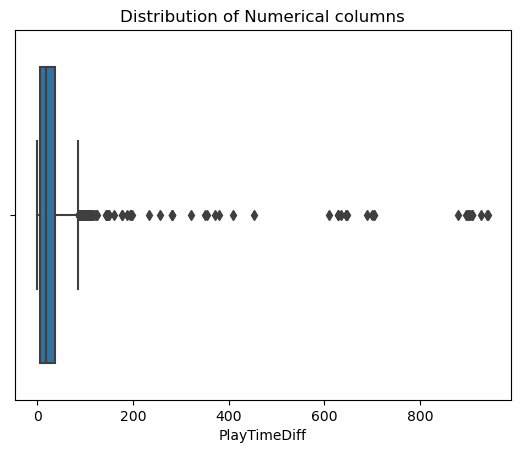

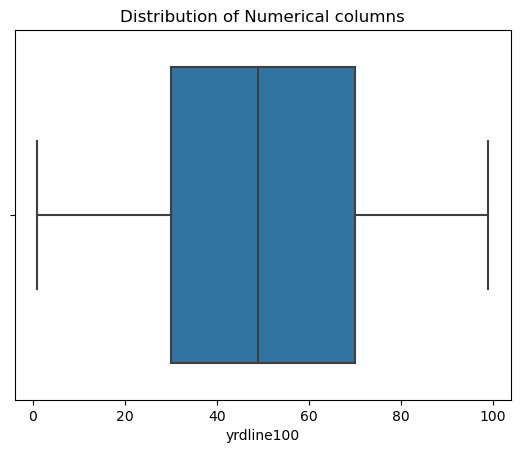

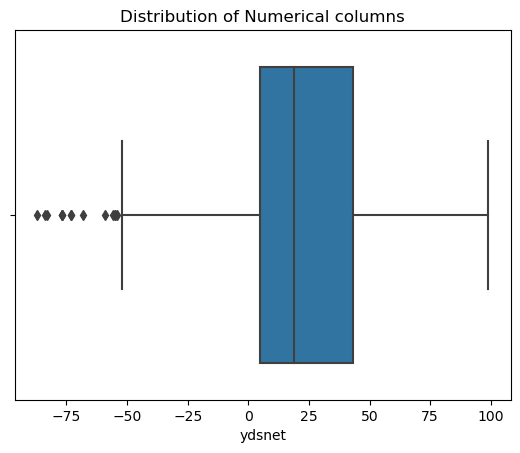

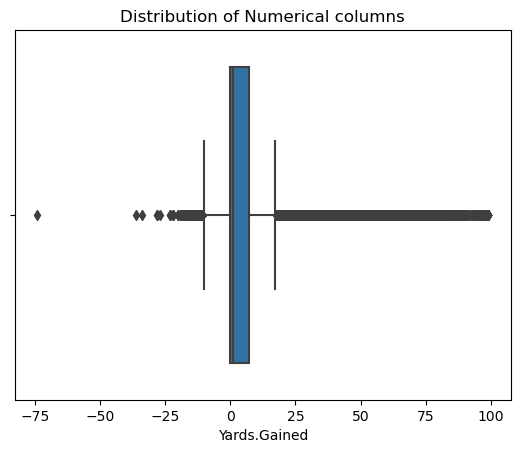

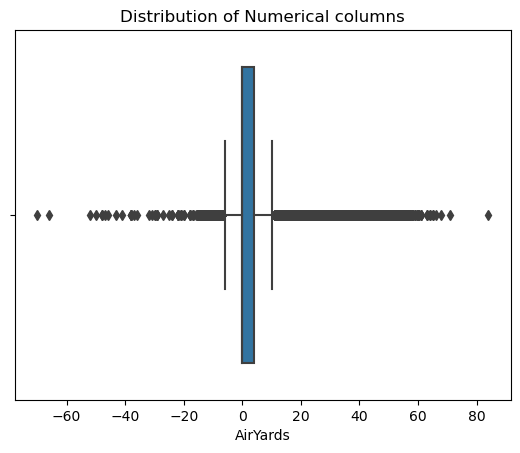

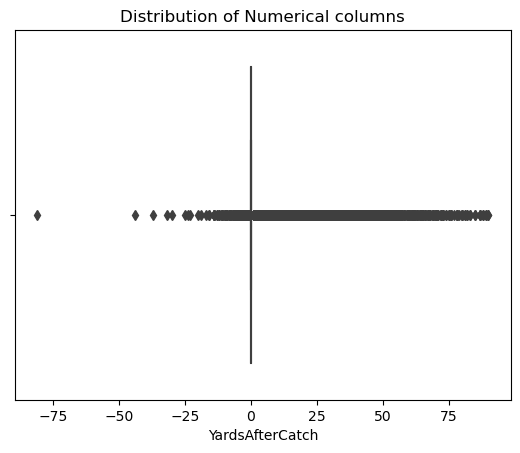

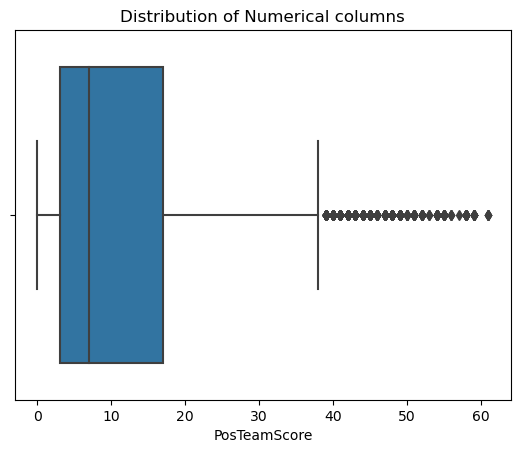

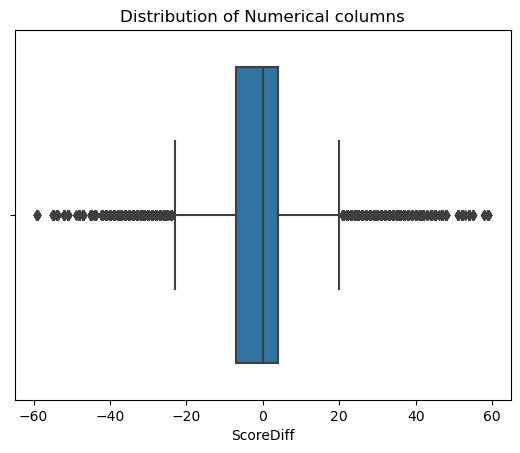

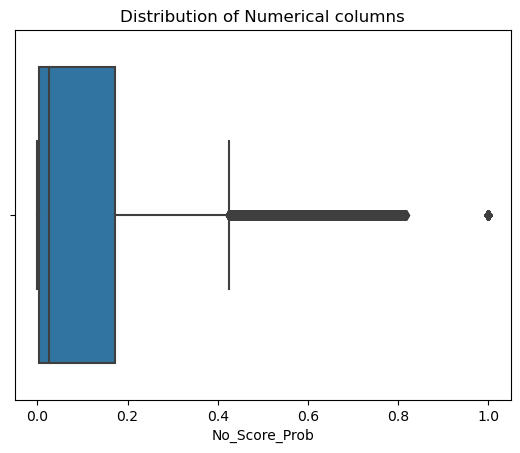

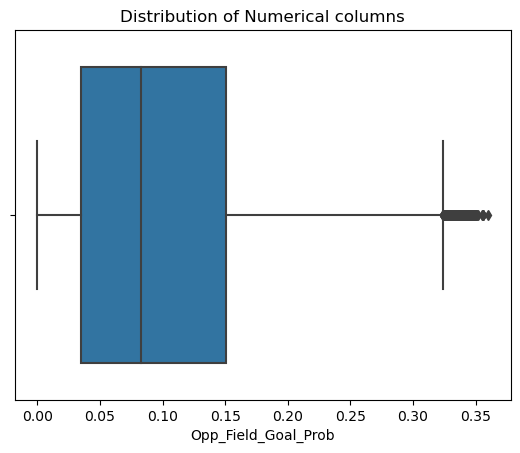

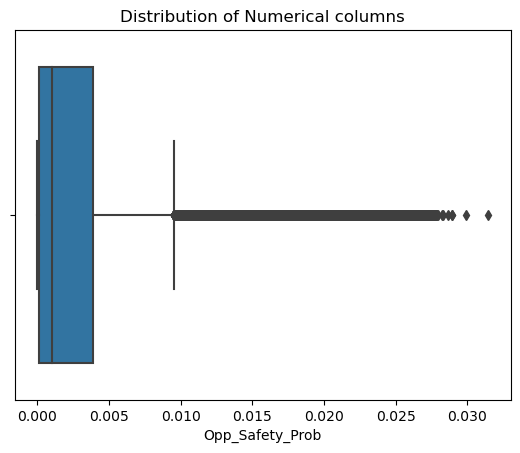

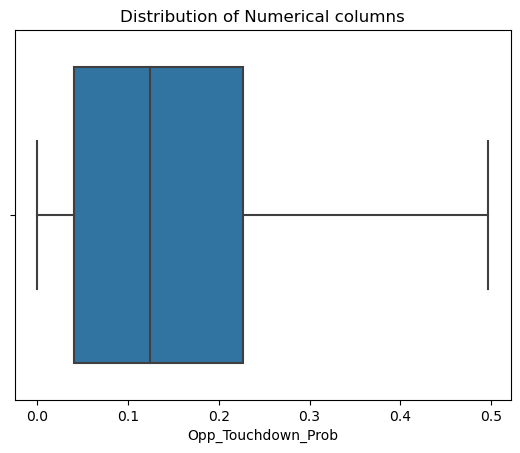

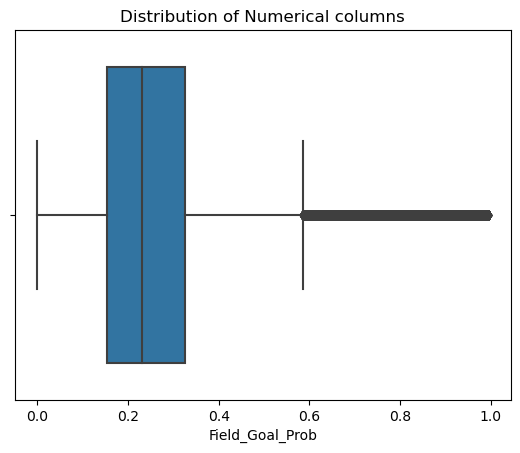

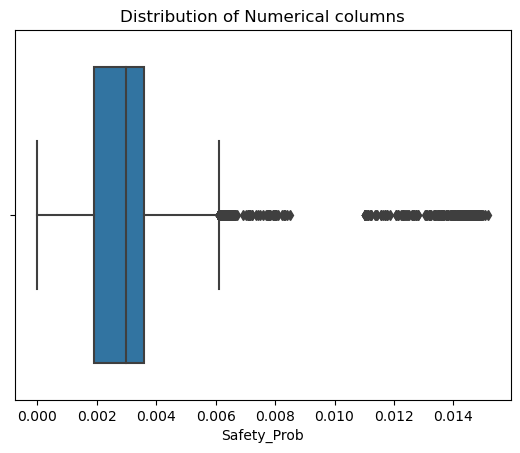

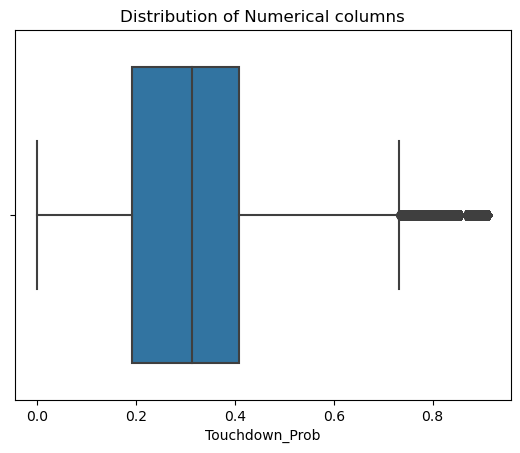

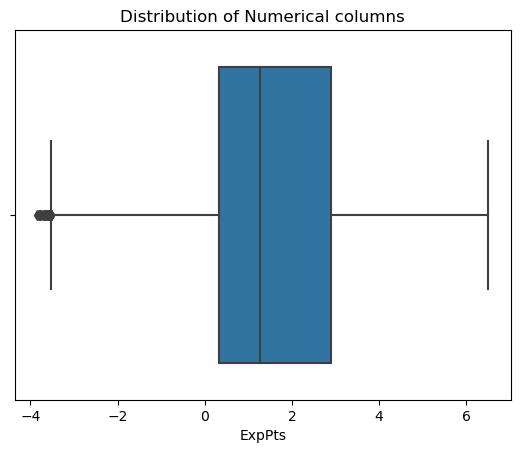

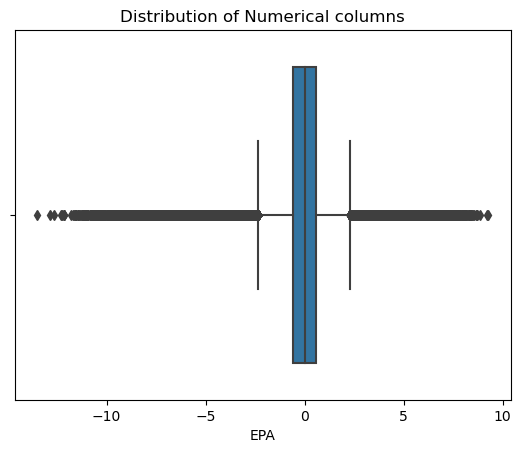

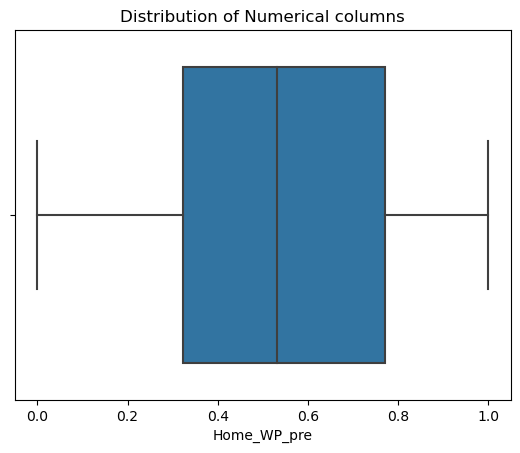

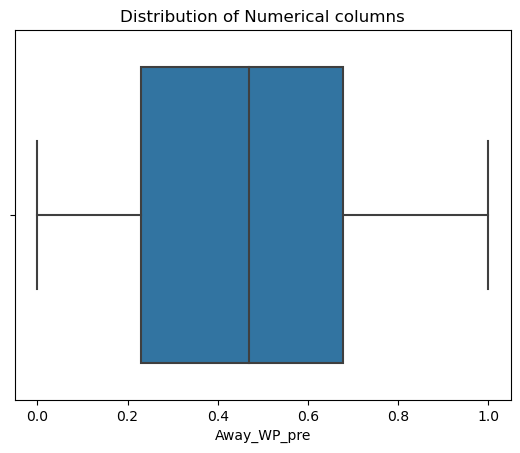

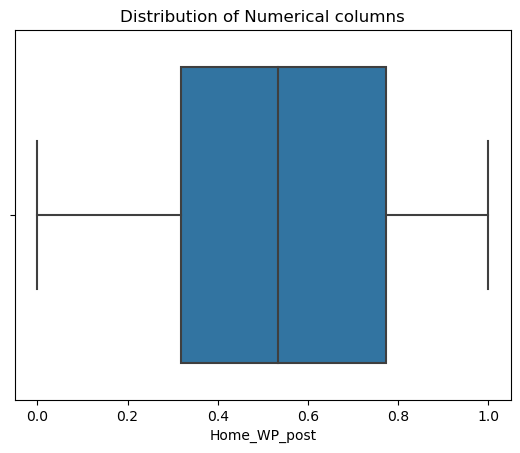

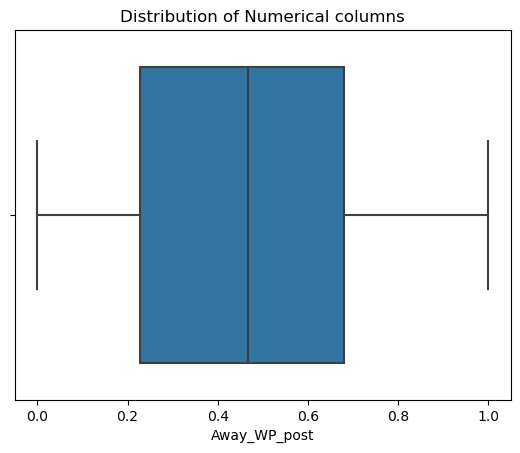

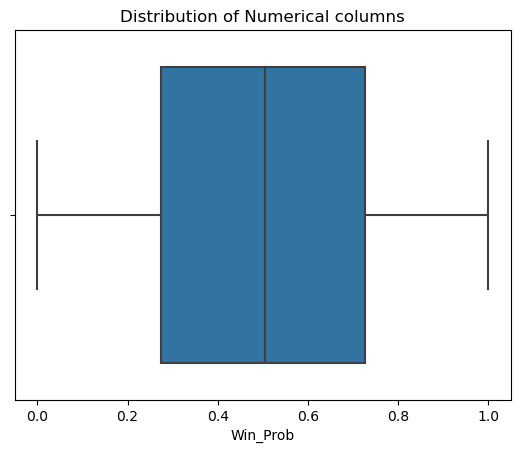

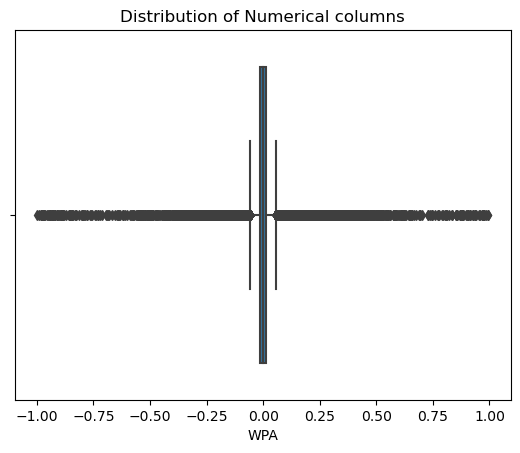

In [43]:
plt.figure(figsize=[4,5])
for cols in Num_col:
    sns.boxplot(x=df[cols])
    plt.title("Distribution of Numerical columns")
    plt.show()
    

### APPROCAH TO PERFORM OUTLIER TREATMENT

In [44]:
game_id_value_counts = df['GameID'].value_counts()
print(game_id_value_counts)

GameID
2011120406    272
2016112709    232
2016103000    231
2012112200    229
2013112403    229
             ... 
2015092705    146
2012110100    146
2009122706    145
2013090801    145
2013120806    125
Name: count, Length: 2048, dtype: int64


In [45]:
filtered_rows = df[df['GameID'] == 2011100202]
print(filtered_rows[['HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post', 'PosTeamScore', 'DefTeamScore','WPA','ScoreDiff'
                    ,'Season','Win_Prob','ScoreDiff']])


      HomeTeam AwayTeam  Home_WP_post  Away_WP_post  PosTeamScore  \
99227      HOU      PIT      0.443747      0.556253           0.0   
99228      HOU      PIT      0.432536      0.567464           0.0   
99229      HOU      PIT      0.485955      0.514045           0.0   
99230      HOU      PIT      0.463515      0.536485           0.0   
99231      HOU      PIT      0.507461      0.492539           0.0   
...        ...      ...           ...           ...           ...   
99378      HOU      PIT      0.975554      0.024446          10.0   
99379      HOU      PIT      0.974167      0.025833          10.0   
99380      HOU      PIT      0.948017      0.051983          10.0   
99381      HOU      PIT      1.000000      0.000000          17.0   
99382      HOU      PIT      1.000000      0.000000           NaN   

       DefTeamScore       WPA  ScoreDiff  Season  Win_Prob  ScoreDiff  
99227           0.0 -0.041928        0.0    2011  0.485675        0.0  
99228           0.0 -0.0112

In [46]:
# Getting rid of extra rows, so we can have rows only with final score in each game
columns_to_keep = ['GameID', 'Date', 'HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post','PosTeamScore','DefTeamScore', 
                   'WPA','ScoreDiff','Season','Win_Prob']
final_scores = df.groupby('GameID')[columns_to_keep].tail(1)

In [47]:
final_scores

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,NaN,10.0,10.0,NaN,0.0,2009,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,1.0,NaN,0.0,0.0,15.0,2009,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,0.0,NaN,0.0,0.0,19.0,2009,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,1.0,NaN,0.0,0.0,13.0,2009,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,1.0,NaN,0.0,0.0,18.0,2009,2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
361723,2017010112,2017-01-01,DEN,OAK,1.0,0.0,NaN,0.0,0.0,18.0,2016,2.220446e-16
361889,2017010111,2017-01-01,WAS,NYG,NaN,NaN,10.0,13.0,NaN,-3.0,2016,8.348558e-02
362062,2017010115,2017-01-01,SF,SEA,0.0,1.0,NaN,0.0,0.0,2.0,2016,9.941040e-01
362256,2017010100,2017-01-01,ATL,NO,1.0,0.0,NaN,0.0,0.0,6.0,2016,9.949601e-01


In [48]:
final_scores.head(10)

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,NaN,10.0,10.0,NaN,0.0,2009,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,1.0,NaN,0.0,0.0,15.0,2009,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,0.0,NaN,0.0,0.0,19.0,2009,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,1.0,NaN,0.0,0.0,13.0,2009,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,1.0,NaN,0.0,0.0,18.0,2009,2.220446e-16
1026,2009091306,2009-09-13,IND,JAC,1.0,0.0,NaN,0.0,0.0,2.0,2009,9.946830e-01
1183,2009091303,2009-09-13,CIN,DEN,NaN,NaN,7.0,12.0,NaN,-5.0,2009,6.932074e-02
1369,2009091302,2009-09-13,CAR,PHI,0.0,1.0,NaN,0.0,0.0,26.0,2009,2.220446e-16
1551,2009091301,2009-09-13,BAL,KC,1.0,0.0,NaN,0.0,0.0,-15.0,2009,2.479207e-09
1712,2009091300,2009-09-13,ATL,MIA,1.0,0.0,NaN,0.0,0.0,12.0,2009,1.311539e-06


In [49]:
df.shape

(362447, 68)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         362447 non-null  datetime64[ns]
 1   GameID                       362447 non-null  int64         
 2   Drive                        362447 non-null  int64         
 3   qtr                          362447 non-null  int64         
 4   down                         362447 non-null  float64       
 5   time                         362259 non-null  object        
 6   TimeUnder                    362447 non-null  int64         
 7   TimeSecs                     362259 non-null  float64       
 8   PlayTimeDiff                 362073 non-null  float64       
 9   SideofField                  362447 non-null  object        
 10  yrdln                        362447 non-null  float64       
 11  yrdline100                

### Calculating Win points

In [51]:
# Creating function to calculate points by scores in the game

def calculate_points(row):
    if row['Home_WP_post'] > row['Away_WP_post']:
        return 2, 0 
    elif row['Home_WP_post'] < row['Away_WP_post']:
        return 0, 2  
    else:
        if row['PosTeamScore'] > row['DefTeamScore']:
            return 2, 0
        elif row['PosTeamScore'] < row['DefTeamScore']:
            return 0, 2
        else:
            return 1, 1 

final_scores['home_team_points'], final_scores['away_team_points'] = zip(*final_scores.apply(calculate_points, axis=1))

In [52]:
filtered_games = final_scores[(final_scores['home_team_points'] == 1) | (final_scores['away_team_points'] == 1)]
filtered_games.head(15)

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob,home_team_points,away_team_points
177,2009091000,2009-09-10,PIT,TEN,NaN,NaN,10.0,10.0,NaN,0.0,2009,0.955527,1,1
4724,2009092009,2009-09-20,BUF,TB,NaN,NaN,NaN,0.0,0.0,NaN,2009,NaN,1,1
7305,2009092709,2009-09-27,BUF,NO,NaN,NaN,NaN,0.0,0.0,NaN,2009,NaN,1,1
11313,2009101104,2009-10-11,KC,DAL,NaN,NaN,20.0,20.0,NaN,0.0,2009,0.561189,1,1
12674,2009101110,2009-10-11,DEN,NE,NaN,NaN,17.0,17.0,NaN,0.0,2009,0.881082,1,1
15307,2009101811,2009-10-18,NYJ,BUF,NaN,NaN,13.0,13.0,NaN,0.0,2009,0.780864,1,1
18223,2009110101,2009-11-01,BUF,HOU,NaN,NaN,NaN,0.0,0.0,NaN,2009,NaN,1,1
25799,2009112207,2009-11-22,NYG,ATL,NaN,NaN,31.0,31.0,NaN,0.0,2009,0.929026,1,1
26145,2009112205,2009-11-22,KC,PIT,NaN,NaN,24.0,24.0,NaN,0.0,2009,0.990219,1,1
26665,2009112202,2009-11-22,DET,CLE,NaN,NaN,37.0,37.0,NaN,0.0,2009,0.803443,1,1


### Which team is the best? 

In [53]:
# Create a new DataFrame with the total points for both home and away teams
home_points = final_scores[['HomeTeam', 'home_team_points']].rename(columns={'HomeTeam': 'Team', 'home_team_points': 'Points'})
away_points = final_scores[['AwayTeam', 'away_team_points']].rename(columns={'AwayTeam': 'Team', 'away_team_points': 'Points'})

# Concatenate the home and away points DataFrames
all_points = pd.concat([home_points, away_points])

# Group by team and sum the points
total_points_df = all_points.groupby('Team').agg(Total_Points=('Points', 'sum')).reset_index()

# Sort by total points in descending order
total_points_df = total_points_df.sort_values(by='Total_Points', ascending=False)

print(total_points_df)

   Team  Total_Points
20   NE           187
11   GB           182
9   DEN           159
28  SEA           158
21   NO           155
1   ATL           152
26  PIT           150
13  IND           149
6   CIN           148
2   BAL           143
25  PHI           135
12  HOU           134
29   SF           133
4   CAR           133
8   DAL           132
0   ARI           132
27   SD           131
22  NYG           130
5   CHI           123
16   KC           121
18  MIA           121
19  MIN           121
23  NYJ           116
24  OAK           108
10  DET           106
32  TEN           102
33  WAS           100
3   BUF            98
31   TB            95
30  STL            80
14  JAC            75
7   CLE            72
17   LA            10
15  JAX             5


Text(0.5, 1.0, 'Total Points Scored by Team 2009-2017')

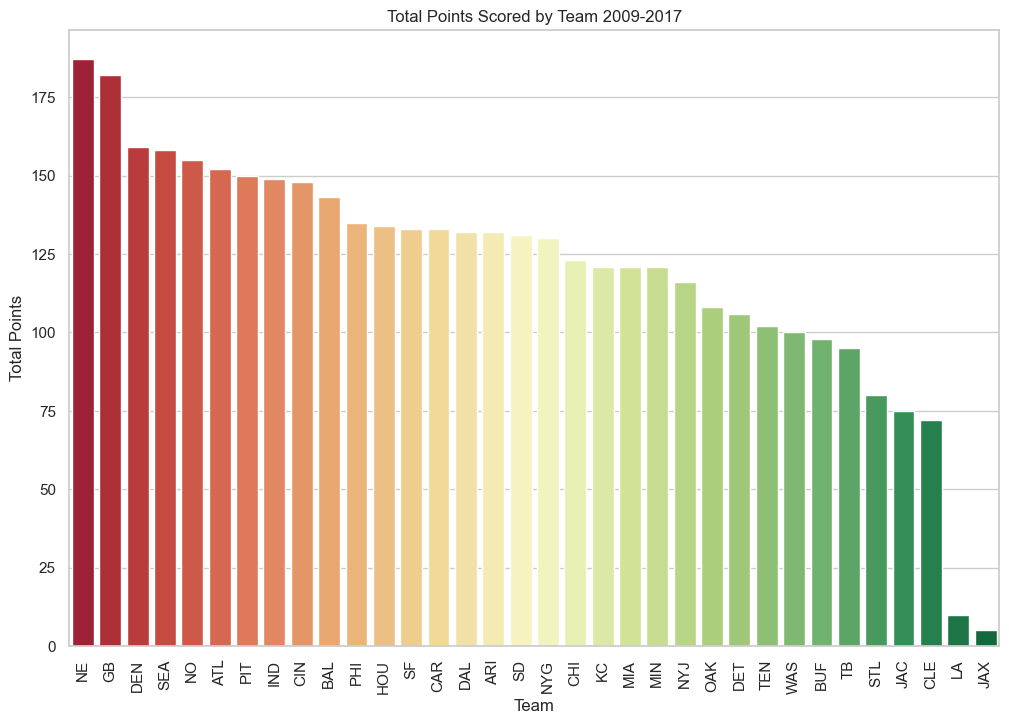

In [54]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.xticks(rotation=90)

# Create a bar plot
bar_plot = sns.barplot(
    x='Team',
    y='Total_Points',
    data=total_points_df,
    palette=sns.color_palette("RdYlGn", n_colors=len(total_points_df))
)

# Add labels and title
bar_plot.set_xlabel('Team')
bar_plot.set_ylabel('Total Points')
bar_plot.set_title('Total Points Scored by Team 2009-2017')

Insights-

Top Performers-

1. New England (NE) leads with 187 total points, followed closely by Green Bay (GB) with 182 points. This indicates 
that these teams have been consistently high-performing in terms of scoring over the analyzed period.

2. Denver (DEN), Seattle (SEA), and New Orleans (NO) also have high total points, suggesting strong offensive
capabilities and likely successful seasons.

Middle Performers-

1. Teams like Pittsburgh (PIT), Indianapolis (IND), Cincinnati (CIN), and Baltimore (BAL) are in the middle 
range with total points between 143 and 150. These teams have shown solid performance but may not be as dominant
as the top teams.

2. Teams like Philadelphia (PHI), Houston (HOU), San Francisco (SF), and Carolina (CAR) have total points in the
130-135 range, indicating a relatively balanced and competitive field in the mid-tier.

Lower Performers-

1. Teams like Tennessee (TEN), Washington (WAS), Buffalo (BUF), and Tampa Bay (TB) have total points below 100, 
suggesting they have struggled to score consistently.

2. St. Louis (STL), Jacksonville (JAC), Cleveland (CLE), and Los Angeles (LA) are among the lowest-scoring teams, 
indicating significant challenges in their offensive performance.

3. Los Angeles (LA) with 10 points and Jacksonville (JAX) with 5 points are outliers at the very bottom, which might 
indicate particularly poor seasons or specific issues affecting their performance during the period analyzed.

### Win Percentage Comparison Between Home and Away Games

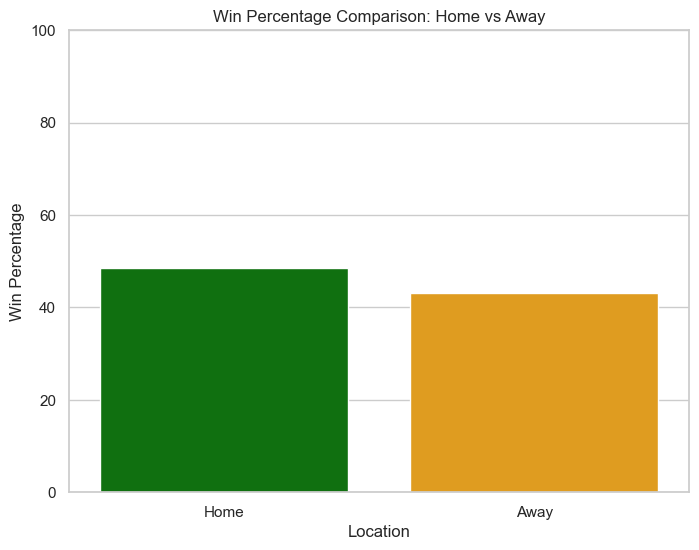

In [55]:
# Calculate home and away wins
home_wins = final_scores[final_scores['home_team_points'] > final_scores['away_team_points']].shape[0]
away_wins = final_scores[final_scores['away_team_points'] > final_scores['home_team_points']].shape[0]

# Calculate total games
total_games = len(final_scores)

# Calculate win percentages
win_percentages = {
    'Home': (home_wins / total_games) * 100,
    'Away': (away_wins / total_games) * 100
}

# Create DataFrame from the dictionary
win_data = pd.DataFrame(list(win_percentages.items()), columns=['Location', 'Win Percentage'])

# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create a bar plot
bar_plot = sns.barplot(
    x='Location',
    y='Win Percentage',
    data=win_data,
    palette=['Green', 'Orange']
)

# Add labels and title
bar_plot.set_xlabel('Location')
bar_plot.set_ylabel('Win Percentage')
bar_plot.set_title('Win Percentage Comparison: Home vs Away')
bar_plot.set(ylim=(0, 100))

# Show the plot
plt.show()

Insight-

The plot does suggest that the home team generally has a higher win percentage than the away team. 
This is a well-known phenomenon in American football, sometimes referred to as “home field advantage.” 
This might be happen beacause of-

1. The home team gets to play in their own stadium, where they are familiar with the field conditions, 
crowd noise, and other factors.

2. The away team has to travel to the game, which can be tiring and disruptive to their routine.

3.  Home teams typically have more fan support than away teams, which can create a more positive and energizing atmosphere.